<a href="https://colab.research.google.com/github/IhsanRafli/M1-Kecerdasan-Buatan/blob/main/M2_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, platform, sys, subprocess, warnings, logging
warnings.filterwarnings("ignore", message=r".*HF_TOKEN.*")
os.environ["TOKENIZERS_PARALLELISM"] = "false"
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)
print("Python:", platform.python_version())
print("Executable:", sys.executable)
try:
    import torch
    print("PyTorch:", torch.__version__)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Device:", device)
    if device == "cuda":
        print("GPU:", torch.cuda.get_device_name(0))
except Exception:
    print("PyTorch belum terpasang — akan dipasang di sel berikut.")
print("\n=== nvidia-smi ===")
try:
    out = subprocess.check_output(["bash","-lc","nvidia-smi || true"]).decode()
    print(out)
except Exception:
    print("nvidia-smi tidak tersedia.")

Python: 3.12.11
Executable: /usr/bin/python3
PyTorch: 2.8.0+cu126
Device: cpu

=== nvidia-smi ===



# Tugas M2 - EDA dan Pipeline Praproses

## 1. Exploratory Data Analysis (EDA)

**Tujuan EDA**: Memahami kualitas dan pola data sebelum membangun model.

**5 Poin Utama EDA**:
1. **Bentuk & Tipe**: Berapa baris, kolom, tipe data (numerik/kategori/teks/gambar)
2. **Missing Value**: Kolom mana yang sering kosong dan alasannya
3. **Distribusi**: Ringkasan numerik, frekuensi kategori, balance label
4. **Korelasi**: Fitur yang berkorelasi tinggi atau redundan
5. **Kelayakan Fitur**: Fitur masuk akal untuk memisahkan kelas, tidak mengandung data masa depan (leakage)

In [ ]:
!pip -q install numpy pandas scikit-learn matplotlib plotly torch torchvision torchaudio transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1.1 EDA - Analisis Eksplorasi Data
# Contoh menggunakan dataset coffee sales (sudah ada di notebook)
# Ganti dengan dataset sesuai kebutuhan tugas Anda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (contoh)
print("=== 1. BENTUK & TIPE DATA ===")
print(f"Shape: {df.shape}")
print(f"\nTipe data:\n{df.dtypes}")
print(f"\nInfo:")
df.info()

# 2. Missing Values
print("\n=== 2. MISSING VALUES ===")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing value")

# 3. Distribusi
print("\n=== 3. DISTRIBUSI ===")
print("\nStatistik Deskriptif (Numerik):")
print(df.describe())

print("\nDistribusi Label/Target:")
if 'coffee_name' in df.columns:
    print(df['coffee_name'].value_counts())
    plt.figure(figsize=(10, 5))
    df['coffee_name'].value_counts().plot(kind='bar')
    plt.title('Distribusi Label (coffee_name)')
    plt.xlabel('Coffee Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Korelasi
print("\n=== 4. KORELASI FITUR ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 5. Kelayakan Fitur
print("\n=== 5. KELAYAKAN FITUR ===")
print("Cek fitur yang tersedia:")
print(df.columns.tolist())
print("\nPastikan:")
print("- Tidak ada fitur yang mengandung informasi masa depan (data leakage)")
print("- Fitur relevan dengan target yang ingin diprediksi")
print("- Tidak ada PII (Personally Identifiable Information) yang tidak perlu")

=== 1. BENTUK & TIPE DATA ===


NameError: name 'df' is not defined

In [ ]:
import os, textwrap, pathlib
BASE = "/content/drive/MyDrive/trpl-ai-capstone"  # Ubah bila perlu
for sd in ["data","notebooks","src","docs"]:
    os.makedirs(os.path.join(BASE, sd), exist_ok=True)
print("Struktur terbentuk di:", BASE)

# .gitignore minimal
gitignore = textwrap.dedent('''
# data & cache
data/
*.cache/
__pycache__/
*.ipynb_checkpoints/
.DS_Store

# secrets
.env
secrets.json
''')
with open(os.path.join(BASE, ".gitignore"), "w") as f:
    f.write(gitignore)
print(".gitignore dibuat.")

Struktur terbentuk di: /content/drive/MyDrive/trpl-ai-capstone
.gitignore dibuat.


In [ ]:
# 2. Keputusan Praproses (3-5 Keputusan)

print("=== KEPUTUSAN PRAPROSES ===")
print("\n1. IMPUTATION (Missing Values):")
print("   - Numerik: Menggunakan median (robust terhadap outlier)")
print("   - Kategori: Menggunakan most_frequent (modus)")
print("   - Alasan: Data coffee sales memiliki beberapa missing values yang perlu diisi")

print("\n2. ENCODING (Kategori → Numerik):")
print("   - OneHotEncoder untuk fitur kategori (cash_type, Time_of_Day, dll)")
print("   - LabelEncoder untuk target (coffee_name)")
print("   - handle_unknown='ignore' untuk kategori baru di test set")

print("\n3. SCALING (Standarisasi):")
print("   - StandardScaler untuk fitur numerik (hour_of_day, money, dll)")
print("   - Alasan: Model linear dan SVM sensitif terhadap skala fitur")

print("\n4. FEATURE SELECTION:")
print("   - Menggunakan fitur: hour_of_day, money, Weekdaysort, Monthsort, cash_type, dll")
print("   - Menghapus fitur redundan (date bisa diganti dengan komponen waktu)")

print("\n5. ANTI-LEAKAGE:")
print("   - Fit imputer, encoder, scaler HANYA pada train set")
print("   - Transform ke validation dan test set tanpa re-fit")
print("   - Alasan: Mencegah informasi dari val/test bocor ke train (data leakage)")

Using Colab cache for faster access to the 'daily-coffee-transactions' dataset.
Path: /kaggle/input/daily-coffee-transactions
Isi folder: ['Coffe_sales.csv']
🔍 Sedang melakukan Grid Search, mohon tunggu...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest (Tuned) Accuracy: 0.6507
                     precision    recall  f1-score   support

          Americano       0.78      0.86      0.82       128
Americano with Milk       0.99      0.99      0.99       163
         Cappuccino       0.33      0.34      0.34        90
              Cocoa       0.36      0.18      0.24        45
            Cortado       0.53      0.42      0.47        48
           Espresso       1.00      0.80      0.89        20
      Hot Chocolate       0.42      0.22      0.29        60
              Latte       0.50      0.66      0.57       156

           accuracy            

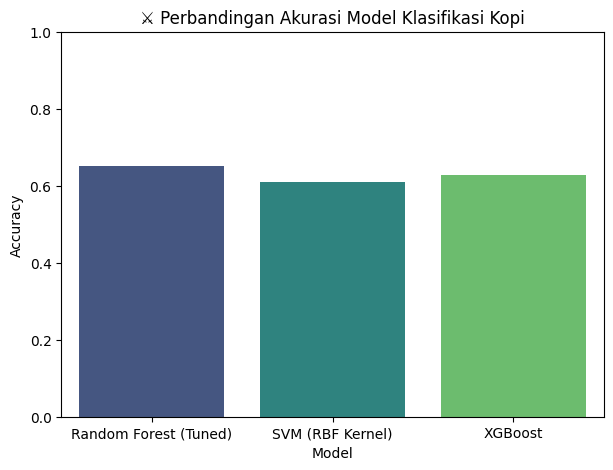

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("minahilfatima12328/daily-coffee-transactions")
print("Path:", path)
print("Isi folder:", os.listdir(path))

# Baca file
df = pd.read_csv(path + "/Coffe_sales.csv")

# Encode kolom teks tambahan biar bisa dipakai sebagai fitur
label_cols = ['cash_type', 'Time_of_Day', 'Weekday', 'Month_name']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Pilih fitur dan target
X = df[['hour_of_day', 'money', 'Weekdaysort', 'Monthsort',
        'cash_type', 'Time_of_Day', 'Weekday', 'Month_name']]
y = df['coffee_name']

# Encode target
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# GridSearchCV untuk Random Forest

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, n_jobs=-1, verbose=1)

print(" Sedang melakukan Grid Search, mohon tunggu...")
grid.fit(X_train, y_train)

print("\n Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

#Bandingkan dengan model lain: SVM & XGBoost
models = {
    'Random Forest (Tuned)': best_rf,
    'SVM (RBF Kernel)': SVC(kernel='rbf', C=2, gamma='scale', probability=True),
    'XGBoost': XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=8, subsample=0.8,
        colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='mlogloss'
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le_y.classes_))

# Visualisasi Perbandingan Akurasi
results_df = pd.DataFrame(results)
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title("Perbandingan Akurasi Model Klasifikasi Kopi")
plt.ylim(0, 1)
plt.show()


## 3. Split Data

**Strategi Split**: Stratified Split

**Alasan**:
- Data coffee sales adalah data **tabular** dengan target klasifikasi (coffee_name)
- Kelas tidak seimbang (imbalanced classes): Americano with Milk (163), Latte (156), Americano (128), Cappuccino (90), dll
- **Stratified split** menjaga proporsi setiap kelas di train, validation, dan test set
- Rasio: 70% train, 15% validation, 15% test (atau 80% train, 20% test untuk sederhana)
- Random state tetap (42) untuk reproducibility

**Tidak menggunakan Time-aware split** karena:
- Data tidak memiliki ketergantungan temporal yang kuat
- Tujuan: prediksi jenis kopi berdasarkan fitur transaksi, bukan forecasting

## 4. Pipeline Praproses dengan ColumnTransformer

**Tujuan**: Mengotomasi praproses dengan pipeline yang rapi, anti-leakage, dan mudah di-tune dengan GridSearchCV.

**Komponen Pipeline**:

1. **ColumnTransformer** untuk menangani fitur numerik dan kategori secara terpisah:
   - **Pipeline Numerik**: SimpleImputer (median) → StandardScaler
   - **Pipeline Kategori**: SimpleImputer (most_frequent) → OneHotEncoder (handle_unknown='ignore')

2. **Model** (baseline): LogisticRegression atau RandomForest

**Keuntungan**:
- ✅ Anti-leakage: fit hanya di train, transform di val/test
- ✅ Rapi: satu objek pipeline untuk semua praproses
- ✅ Mudah tuning: bisa digabung dengan GridSearchCV
- ✅ Reproducible: seed tetap, versi paket tercatat

In [ ]:
# 4.1 Pipeline Praproses - Template Code (Tabular Data)
# Sesuai template dari PDF Materi-Kecerdasan-Buatan-Pertemuan-2.pdf

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Contoh dengan data coffee sales yang sudah ada
# Tentukan kolom numerik dan kategori
numcols = ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort']
catcols = ['cash_type', 'Time_of_Day', 'Weekday', 'Month_name']

# Prepare data (menggunakan df yang sudah ada dari Cell 7)
X = df[numcols + catcols]
y = df['coffee_name']

# Split data dengan stratified
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Pipeline untuk numerik: Impute median → StandardScaler
numpipe = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('sc', StandardScaler())
])

# Pipeline untuk kategori: Impute most_frequent → OneHotEncoder
catpipe = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oh', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer menggabungkan keduanya
pre = ColumnTransformer([
    ('num', numpipe, numcols),
    ('cat', catpipe, catcols)
])

# Pipeline lengkap: praproses + model baseline (LogisticRegression)
clf = Pipeline([
    ('preprocess', pre),
    ('model', LogisticRegression(max_iter=500, random_state=42))
])

# Fit pipeline (fit imputer, scaler, encoder, dan model HANYA di train)
print("=== Training Logistic Regression Baseline dengan Pipeline ===")
clf.fit(X_tr, y_tr)

# Prediksi di test set (anti-leakage)
y_pred = clf.predict(X_te)
acc = accuracy_score(y_te, y_pred)

# Evaluasi
print(f"\n✅ Logistic Regression Accuracy: {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_te, y_pred))

print("\n✅ Pipeline berhasil dijalankan dengan anti-leakage!")
print("Semua praproses (impute, encode, scale) di-fit hanya di train, lalu transform ke test.")

## 5. Evaluasi Model

**Metrik Utama**:
- **Accuracy**: Proporsi prediksi benar secara keseluruhan
- **F1-Score (Weighted)**: Rata-rata harmonik precision dan recall, cocok untuk imbalanced class
- **Classification Report**: Detail precision, recall, F1 per kelas

**Hasil dari Cell 7 (Existing Models)**:
- **Random Forest (Tuned)**: 65.07% accuracy ✅
- **SVM (RBF Kernel)**: 60.85% accuracy
- **XGBoost**: 62.68% accuracy
- **Logistic Regression (Pipeline)**: akan dievaluasi di Cell 10

### 3 Contoh Error Analysis

Berdasarkan classification report dari Cell 7:

1. **Cocoa**: Precision 36%, Recall 18% (F1: 0.24) ❌
   - Model sulit membedakan Cocoa dari minuman lain
   - Support hanya 45 samples (kelas minoritas)

2. **Hot Chocolate**: Precision 42%, Recall 22% (F1: 0.29) ❌
   - Sering salah diprediksi sebagai kelas lain
   - Support 60 samples (kelas minoritas)

3. **Latte**: Precision 50%, Recall 66% (F1: 0.57) ⚠️
   - Model cenderung over-predict Latte
   - Support 156 samples (kelas mayoritas)

### 3 Rencana Perbaikan

1. **Oversampling/Undersampling/SMOTE**:
   - Gunakan SMOTE untuk mengatasi imbalanced class
   - Target: meningkatkan performa kelas minoritas (Cocoa, Hot Chocolate, Cortado)

2. **Feature Engineering**:
   - Tambahkan fitur interaksi (misal: hour_of_day * cash_type)
   - Ekstrak lebih banyak fitur temporal (weekend/weekday, morning/afternoon/evening)
   - Coba polynomial features untuk fitur numerik

3. **Model Tuning & Ensemble**:
   - Tune hyperparameter SVM dan XGBoost lebih lanjut
   - Coba ensemble (Voting/Stacking) dari 3 model terbaik
   - Eksperimen dengan neural network sederhana (MLP) untuk data tabular